# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [2]:
# Libraries to help with reading and manipulating data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [3]:
#getting dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/SupervisedLearning/INNHotelsGroup.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
datac = data.copy()

## Data Overview

- Observations
- Sanity checks

In [6]:
#checking first 5 and last 5 rows of the data
datac.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [7]:
datac.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [8]:
datac.duplicated().sum()

0



*   There are no duplicates in the data



In [9]:
#dropping booking_id
data = datac.drop('Booking_ID',axis=1)

In [10]:
#checking the shape of the data
data.shape

(36275, 18)



*   There are 36275 rows and 18 columns in the data




In [11]:
#statiscal summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000




*   There are maximum of 4 adults in a family.
*   Maximum customers stay for 2 weekend nights.
*   Maximum lead time is 443 days and mean is about 85 days. 75% of the bookings have lead time about 126 days.
*   Maximum people prefer the month of October.
*   Maximum average price of a room is 540 euros.








In [12]:
#checking the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_



*   There are 14 numerical and 4 object type data.




In [13]:
#checking for missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64



*   There are no missing values in the data.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Univariate Analysis**

**no_of_adults**

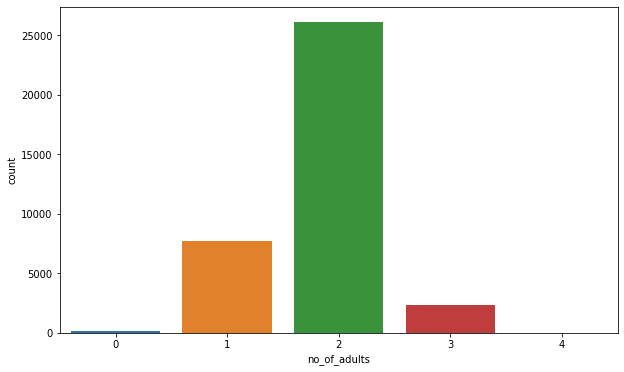

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='no_of_adults');



*   There are maximum of 2 adults checking in. 



**no_of_children**

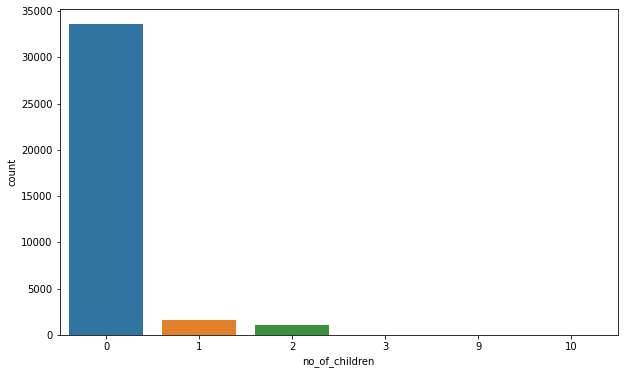

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='no_of_children');



*   There are maximum count of no children in the family.
*   It seems there are a few counts of 9 and 10 children too which seems wrong. Lets replace them with 3 children. 



In [16]:
data['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [17]:
#replacing 9 and 10 to 3
data['no_of_children'] = data['no_of_children'].replace([9,10],3)

In [18]:
data['no_of_children'].value_counts()

0    33577
1     1618
2     1058
3       22
Name: no_of_children, dtype: int64

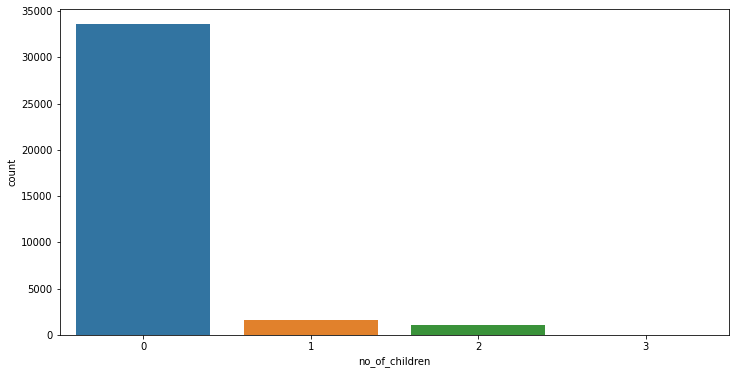

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='no_of_children');



*   No 9 and 10 are present in the data.



**no_of_weekend_nights**

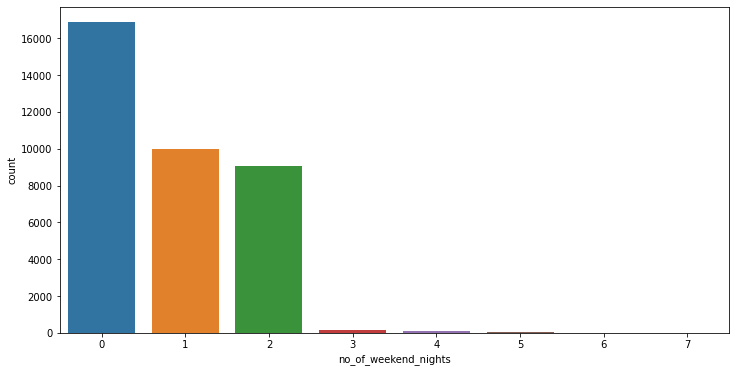

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='no_of_weekend_nights');



*   Most of the people come over during the week and not weekend.




**no_of_week_nights**

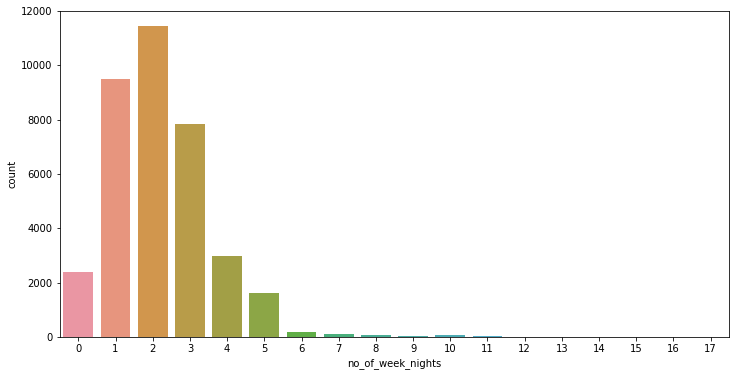

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='no_of_week_nights');

In [22]:
data['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64



*   Most of them check in for 2 weekend nights.




**type_of_meal_plan**

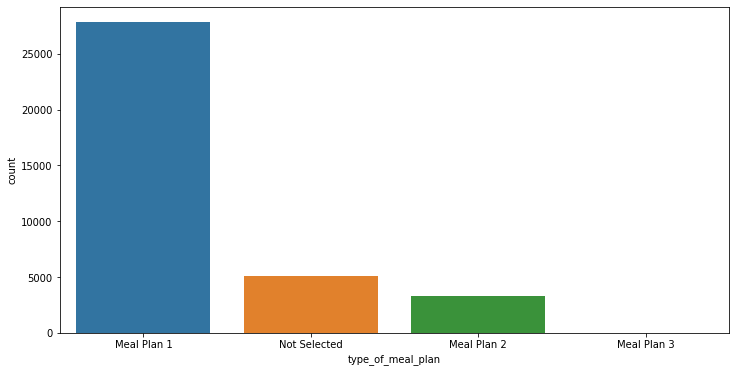

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='type_of_meal_plan');



*   People prefer Meal Plan 1 the most and Mean Plan 3 the least. There are people not selecting any Meal Plan. 




**required_car_parking_space**

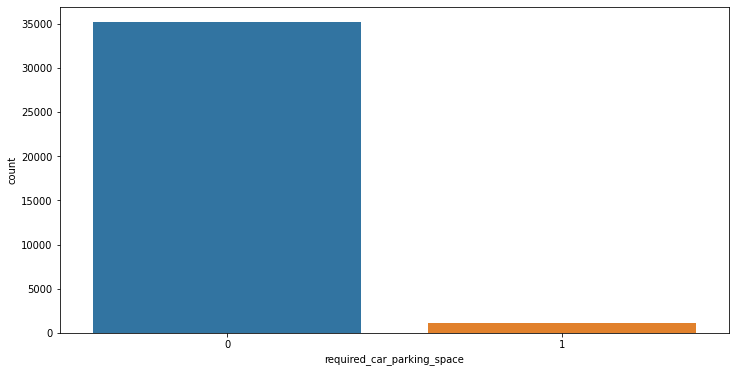

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='required_car_parking_space');



*   Most of them do not need a parking space. 




**room_type_reserved**

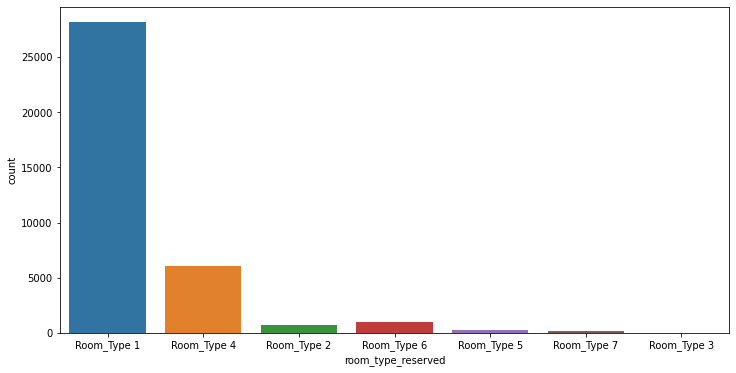

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='room_type_reserved');



*   About 27500 prefer Room type 1




**arrival_year**

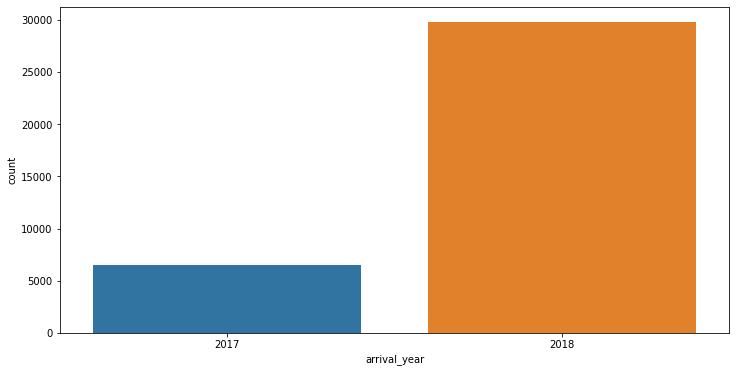

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='arrival_year');



*   Business was on peak in 2018.




**arrival_month**

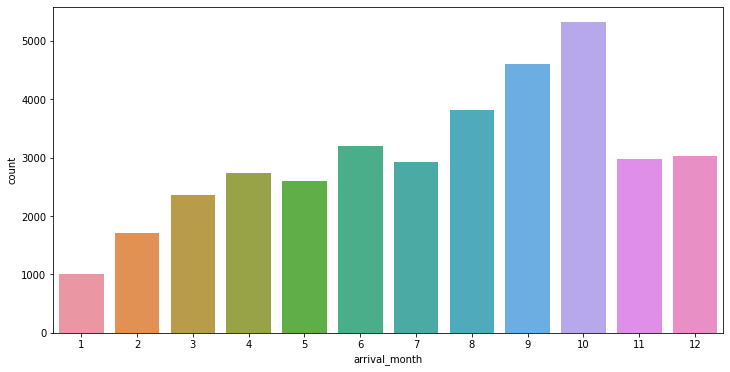

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='arrival_month');



*   Bookings are maximum in the month of October.



**market_segment_type**

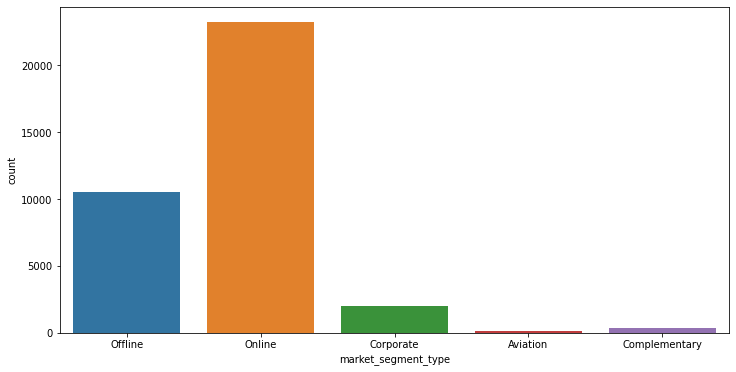

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='market_segment_type');



*   Most of the bookings are done online. 




**no_of_special_requests**

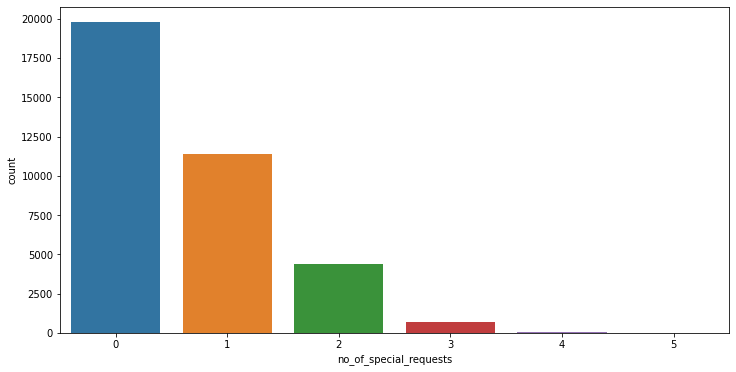

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='no_of_special_requests');



*   Most of the bookings don't have any special requests.




**booking_status**

In [30]:
#since the booking status is divided into 2, we can simplify it by numbering it
data['booking_status'] = data['booking_status'].apply(
  lambda x:1 if x == 'Canceled' else 0
)

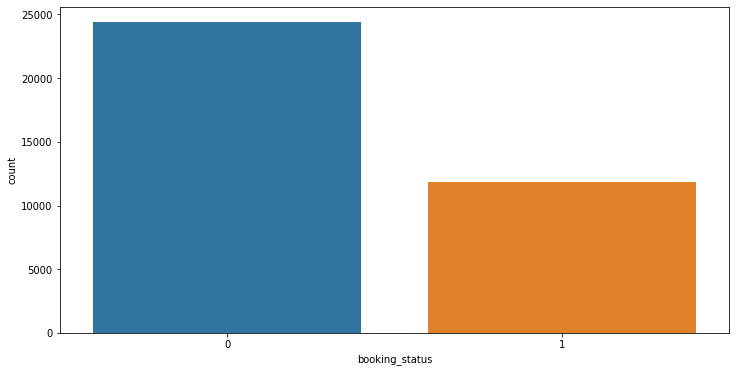

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='booking_status');



*   About 29% of the booking are cancelled.  




**lead_time**

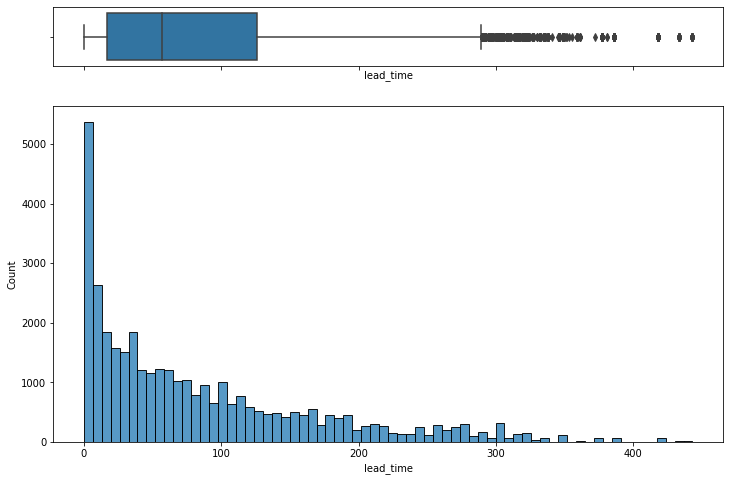

In [32]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,8))

# assigning a graph to each ax
sns.boxplot(data=data,x='lead_time', ax=ax_box);
sns.histplot(data=data, x='lead_time', ax=ax_hist);
 



*   Mean lead time is about 85 days. 
*   The graph is highly right skewed having minimum lead time of 0.



**avg_price_per_room**

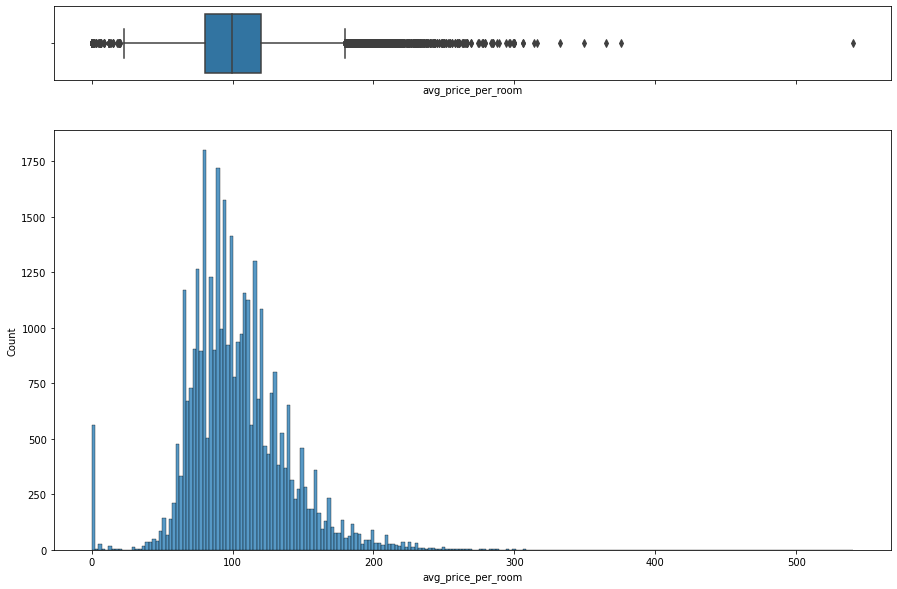

In [33]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,10))

# assigning a graph to each ax
sns.boxplot(data=data,x='avg_price_per_room', ax=ax_box);
sns.histplot(data=data, x='avg_price_per_room', ax=ax_hist);
 



*   Mean average price per room is around 99 euros.
*   There are rooms with 0 price also which is not possible in real life. We will replace those values.
*   There are a few outliers too with very high price. We will replace those values too.





In [34]:
#number of rooms with price 0
data[data['avg_price_per_room'] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,0
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,0
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,0
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,0
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,0
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,0
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,0
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,0


In [35]:
#checking the booking method
data.loc[data['avg_price_per_room'] == 0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64



*   There are 191 online bookings.




In [36]:
# Calculating the 25th quantile and 75th quantile
Q1 = data['avg_price_per_room'].quantile(0.25)
Q3 = data['avg_price_per_room'].quantile(0.75) 
#IQR
IQR = Q3 - Q1

#upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [37]:
#assigining all 0 values and outliers to upper whisker 
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**no_of_previous_cancellations**

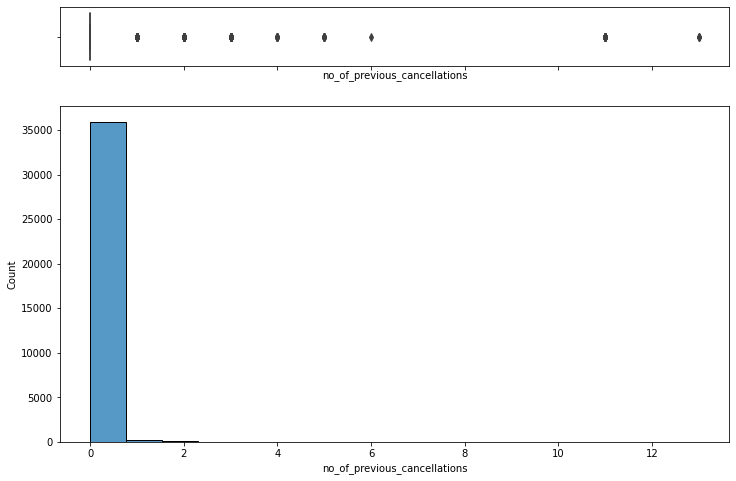

In [38]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,8))

# assigning a graph to each ax
sns.boxplot(data=data,x='no_of_previous_cancellations', ax=ax_box);
sns.histplot(data=data, x='no_of_previous_cancellations', ax=ax_hist);
 



*   Most of the bookings are not cancelled.




**no_of_previous_bookings_not_canceled**

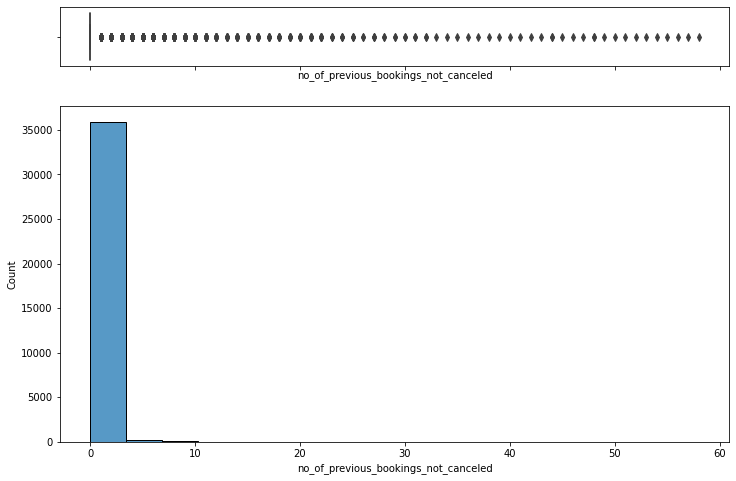

In [39]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,8))

# assigning a graph to each ax
sns.boxplot(data=data,x='no_of_previous_bookings_not_canceled', ax=ax_box);
sns.histplot(data=data, x='no_of_previous_bookings_not_canceled', ax=ax_hist);

**Bivariate Analysis**

Checking the correlation

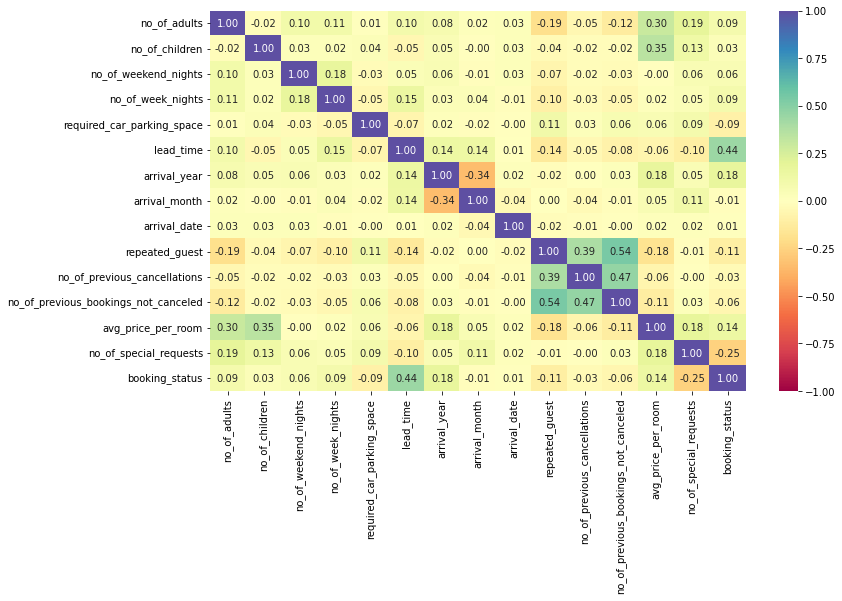

In [40]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()



*   Highest correlation is between number of previous booking not cancelled to repeat guests. 




**market_segment_type and avg_price_per_room**

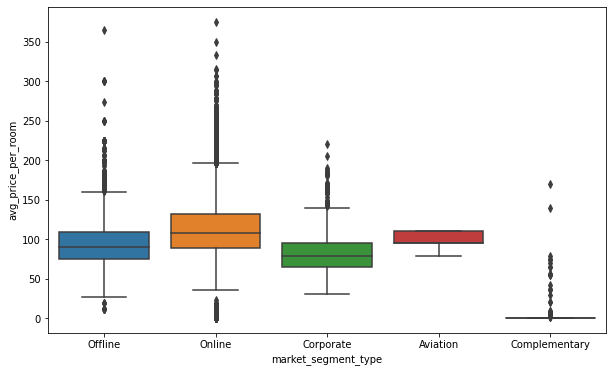

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()



*   As observed, the mean market price is the highest when booked online.




In [42]:
#function for stacked barplot 
def stacked_barplot(data, x, y):

    count = data[x].nunique()
    sorter = data[y].value_counts().index[-1]
    tab1 = pd.crosstab(data[x], data[y], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[x], data[y], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

***Let us observe the relation with booking_status***

**market_segment_type and booking_status**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


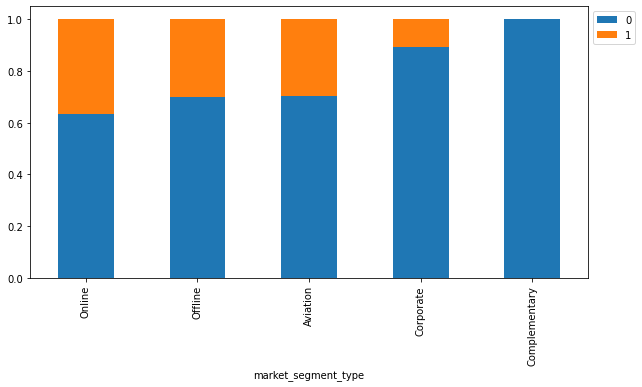

In [43]:
stacked_barplot(data, "market_segment_type", "booking_status")



*   Most of the cancellations are observed when booking is made online.
*   None of the bookings are cancelled when it is complementary.



**no. of special requests and booking status**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


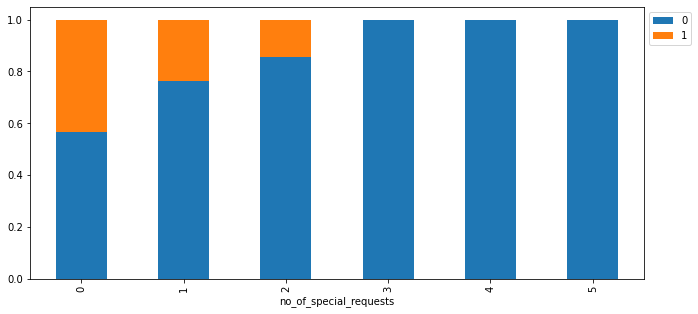

In [44]:
stacked_barplot(data, 'no_of_special_requests', 'booking_status')



*   There are maximum cancellations when there are no special requests.



**no_of_special_requests and avg_price_per_room**

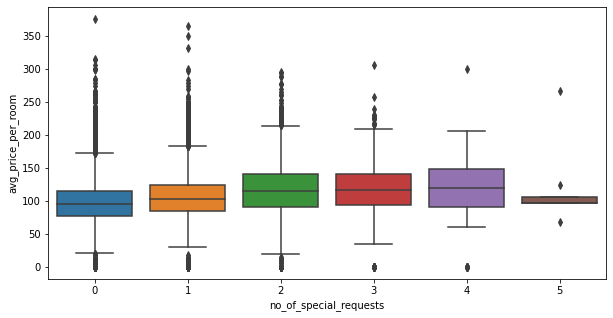

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='no_of_special_requests', y= 'avg_price_per_room') 
plt.show()



*   More the special requests, higher the price of the room.




**booking_status and avg_price_per_room**

In [46]:
#function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

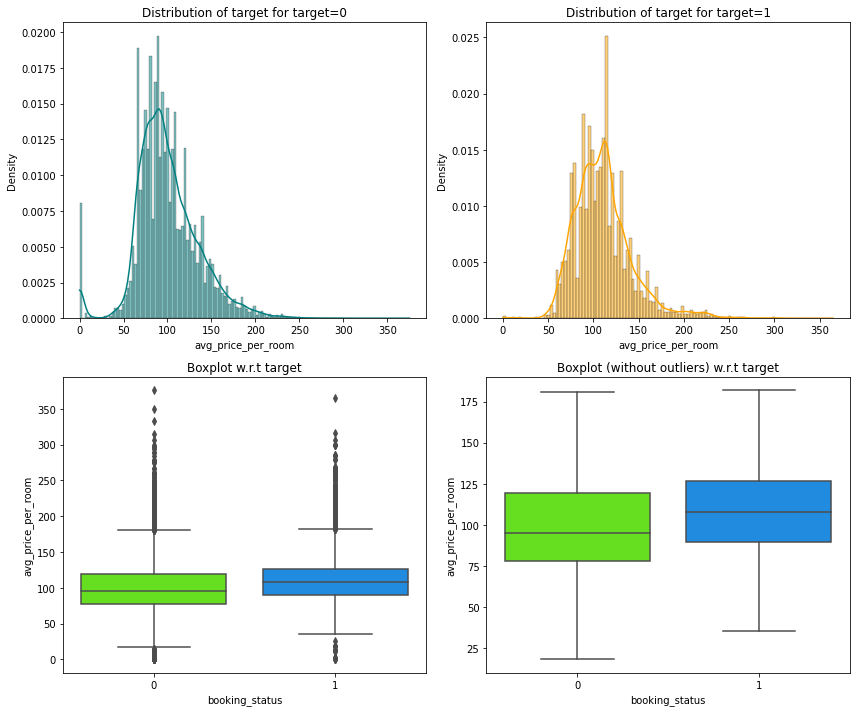

In [47]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")



*   Both of the distribution is right skewed.
*   Higher price rooms are cancelled the most.



**booking_status and lead_time**

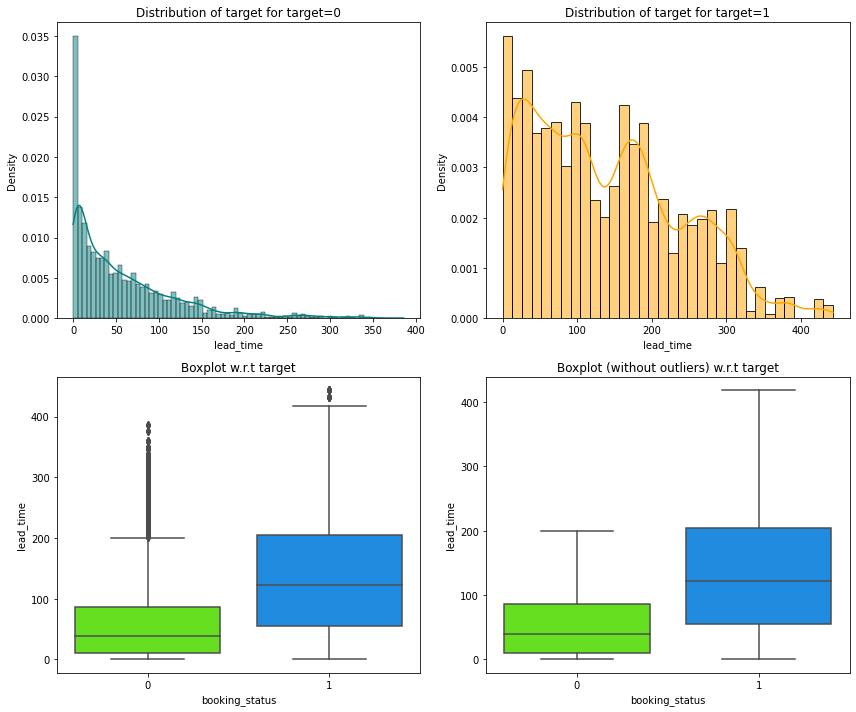

In [48]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")



*   Higher lead time rooms are cancelled the most.




**family members and booking_status**

In [49]:
#lets club adults and children togther in a family
T_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
T_data.shape

(28441, 18)

In [50]:
T_data["no_of_family_members"] = (
    T_data["no_of_adults"] + T_data["no_of_children"]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
T_data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_family_members
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1,2
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00000,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,0,3
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,1,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,0,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,1,2


booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


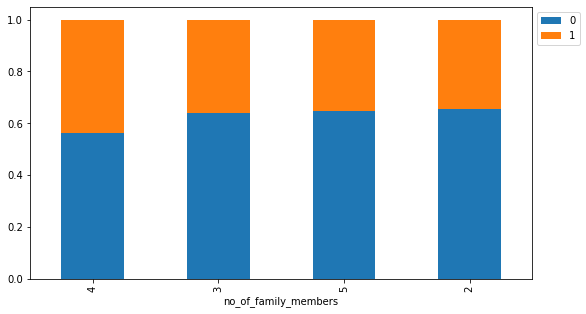

In [52]:
stacked_barplot(T_data,'no_of_family_members', 'booking_status' )



*   Maximum number of cancellations are made with the family of 4.




**total_days and booking_status**

In [53]:
#let us club weekends and weekdays together
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 18)

In [54]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

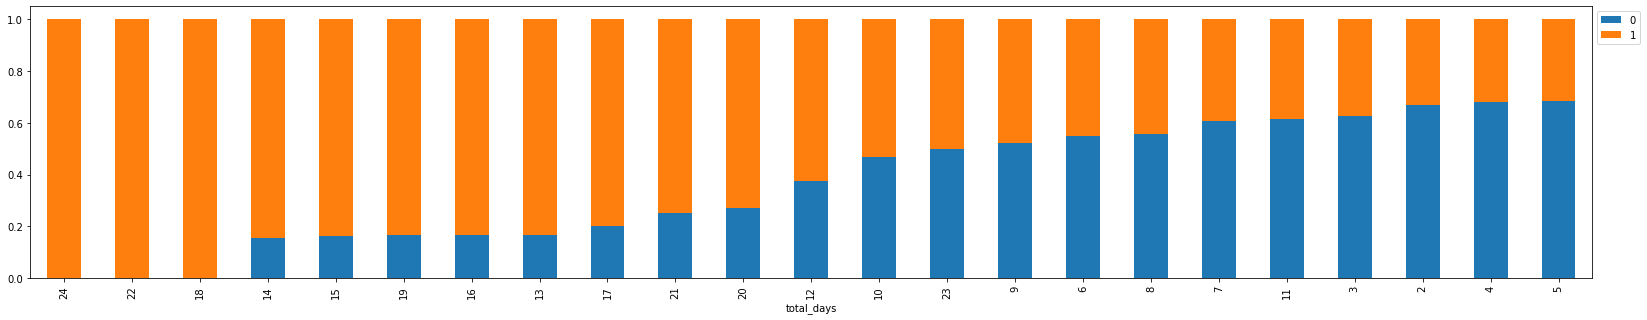

In [55]:
stacked_barplot(stay_data, 'total_days', 'booking_status')



*   Higher the total days, higher the cancellations.




**repeated_guests and booking_status**

booking_status      0     1    All
repeated_guest                    
All             10979  6115  17094
0               10812  6108  16920
1                 167     7    174
------------------------------------------------------------------------------------------------------------------------


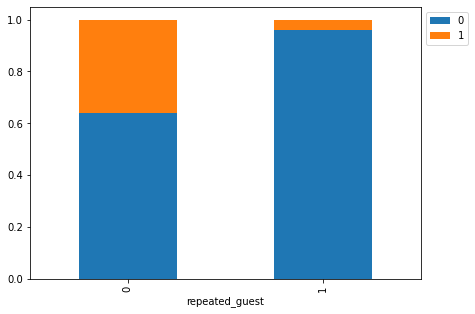

In [56]:
stacked_barplot(stay_data, 'repeated_guest', 'booking_status')



*   As expected, repeated guests tend to cancel less.




**Busiest months**

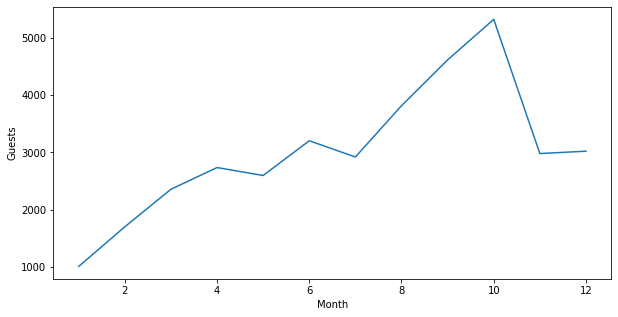

In [57]:
# grouping the data on arrival months 
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()



*   As seen earlier, October is the busiest month.




**Arrival_month and booking_status**

booking_status      0     1    All
arrival_month                     
All             10979  6115  17094
10               1539   913   2452
8                1068   822   1890
9                1203   792   1995
7                 862   751   1613
6                 706   541   1247
4                 906   482   1388
5                 779   474   1253
3                 807   436   1243
11                920   360   1280
2                 556   268    824
12               1237   263   1500
1                 396    13    409
------------------------------------------------------------------------------------------------------------------------


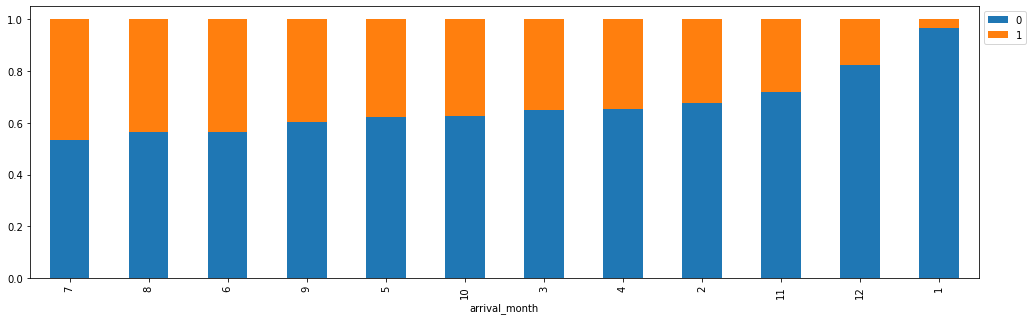

In [58]:
stacked_barplot(stay_data, 'arrival_month', 'booking_status')



*   Least cancellations are in January.




**avg_price_per_room and arrival_month**

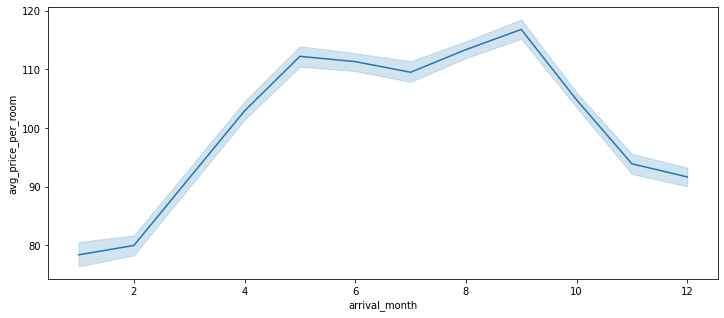

In [59]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=stay_data, x='arrival_month', y='avg_price_per_room') 
plt.show()



*   Since the demand is more in October, prices are more for the rooms.




## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

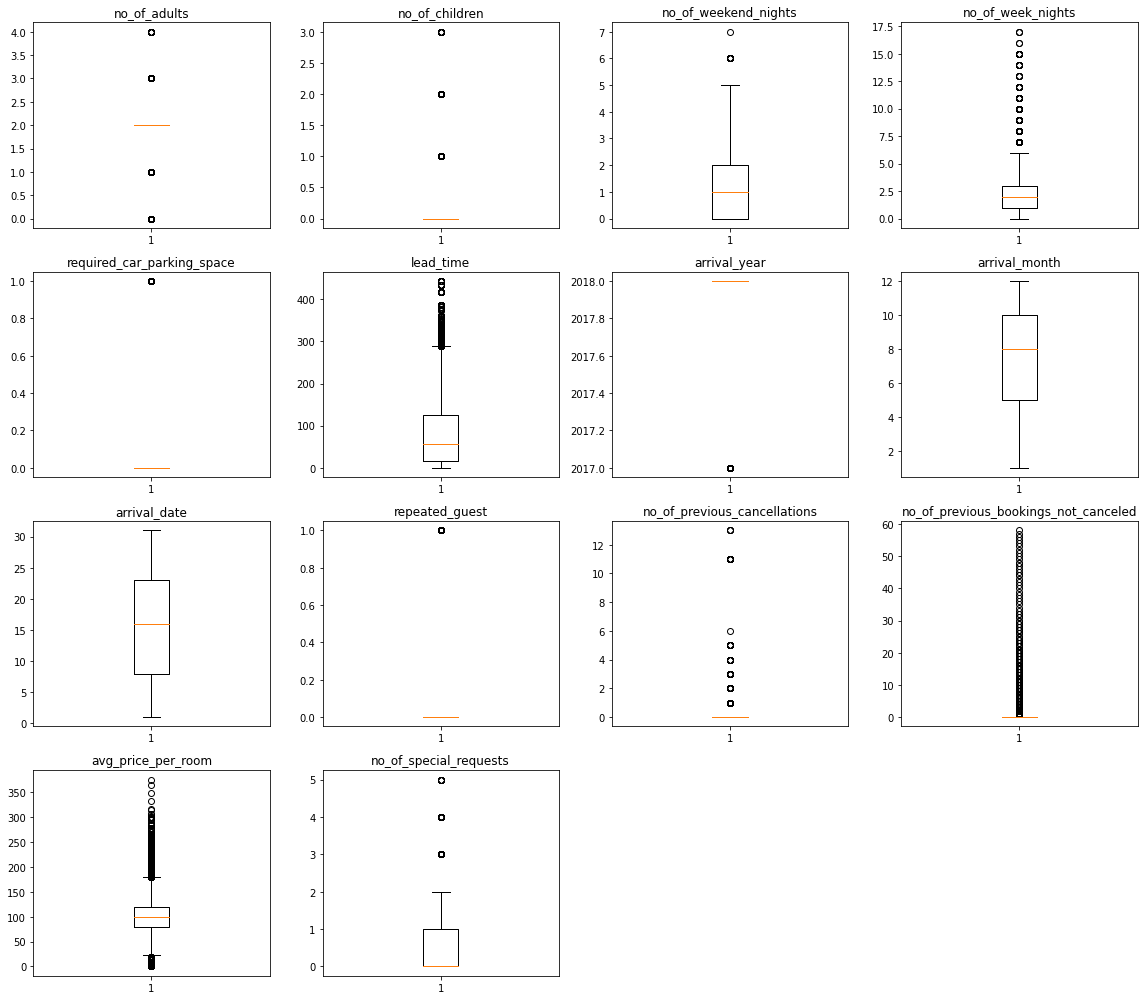

In [60]:
#using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(16, 14))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are a few outliers but we are not treating them since they are facts.




Building function to check model performance and make a confusion matrix

In [61]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
   
    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # Accuracy
    recall = recall_score(target, pred)  # Recall
    precision = precision_score(target, pred)  #  Precision
    f1 = f1_score(target, pred)  # F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [62]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
 
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

**Lets predict which bookings will be cancelled.**

In [63]:
#let us encode categorical features
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

# adding constant
X = sm.add_constant(X) 

X = pd.get_dummies(X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)  

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [64]:
print("Shape of Training set : ", X_train.shape)
print('------------------------------------------')
print("Shape of test set : ", X_test.shape)
print('------------------------------------------')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print('------------------------------------------')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
------------------------------------------
Shape of test set :  (10883, 28)
------------------------------------------
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
------------------------------------------
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Building Regression Model**

In [65]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False) 

print(lg.summary()) 

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 15 Oct 2022   Pseudo R-squ.:                  0.3292
Time:                        14:14:00   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [66]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [67]:
#define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [68]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679




*   VIF seems less than 5.



**Dropping high p-values**

In [69]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    x_train_aux = X_train[cols]
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [70]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [71]:
logit1 = sm.Logit(y_train, X_train1.astype(float)) 
lg1 = logit1.fit(disp=False) 
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 15 Oct 2022   Pseudo R-squ.:                  0.3282
Time:                        14:14:02   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.



*   There are no p-values higher than 0.05.




In [72]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**Converting coefficients to odds**

In [73]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


**Confusion matrix**

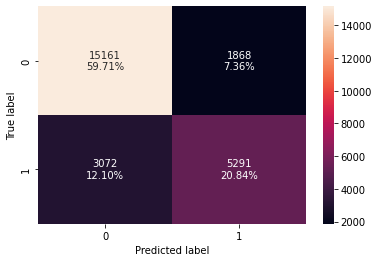

In [74]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [75]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


**ROC-AUC on training set**

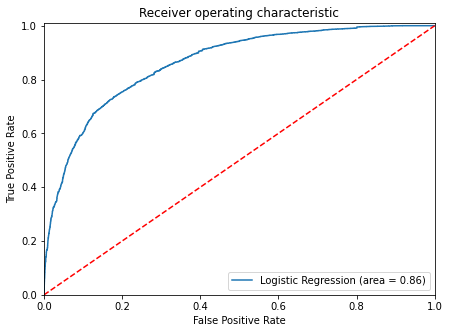

In [76]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Optimal threshold using the above curve**

In [77]:
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707859


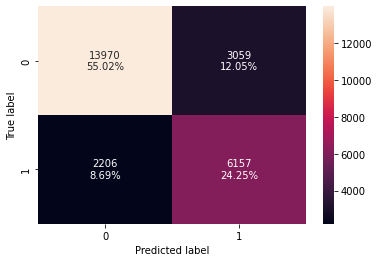

In [78]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc 
) 

In [79]:
# checking model performance
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049




*   Model performance improved a bit.




**Precision recall curve**

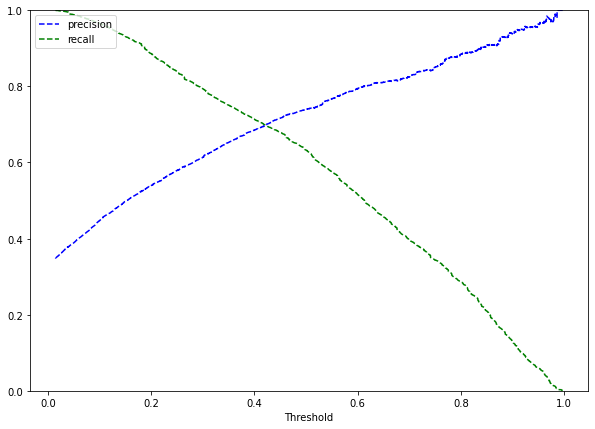

In [80]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()



*   Intersection at around 0.42.



In [81]:
optimal_threshold_curve = 0.42

**Checking model performance on training set**

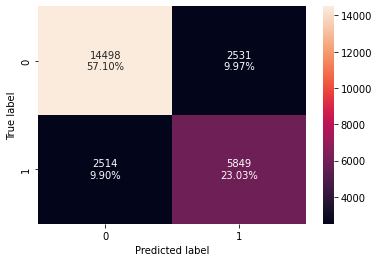

In [82]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [83]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


**Model performance on test set using default threshold**

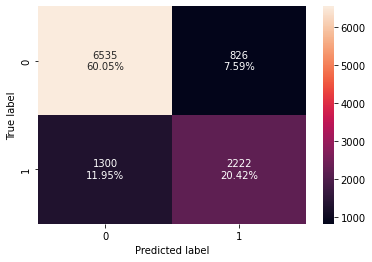

In [84]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [85]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


**ROC curve on test**

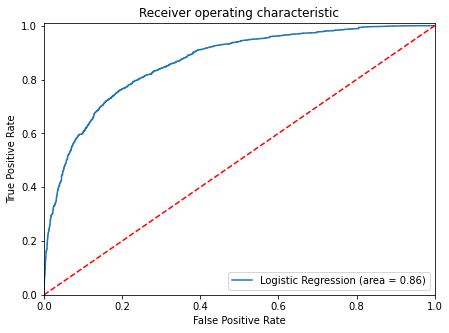

In [86]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using threshold 0.42**

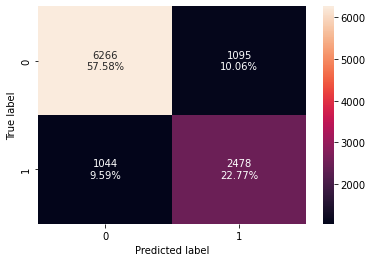

In [87]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.42)

In [88]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=0.42
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


**Using threshold 0.37**

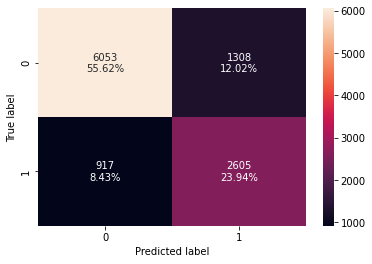

In [89]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.37)

In [90]:
log_reg_model_test_perf_threshold_auc_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=0.37
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


## Final Model Summary

In [91]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [92]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_curve.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852




*   Almost all the three models are performing well on both training and test data without the problem of overfitting
*   The model with a 0.37 threshold is giving the best F1 score. Therefore it can be selected as the final model



## Building a Decision Tree model

**Data preparation to predict which booking will be cancelled.**

In [93]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)  

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 70:30 with random_state = 1

In [94]:
print("Shape of Training set : ", X_train.shape)
print('-------------------------------------------')
print("Shape of test set : ", X_test.shape)
print('-------------------------------------------')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print('-------------------------------------------')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
-------------------------------------------
Shape of test set :  (10883, 27)
-------------------------------------------
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
-------------------------------------------
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


**Functions to build confusion matrix and model performance**

In [95]:
# defining a function to compute different metrics to check performance of a classification model
def model_performance_classification_sklearn(model, predictors, target):
   
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  #Accuracy
    recall = recall_score(target, pred)  #Recall
    precision = precision_score(target, pred)  #Precision
    f1 = f1_score(target, pred)  #F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [96]:
def confusion_matrix_sklearn(model, predictors, target):
 
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Building decision tree model**

In [97]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

**Model performance on training set**

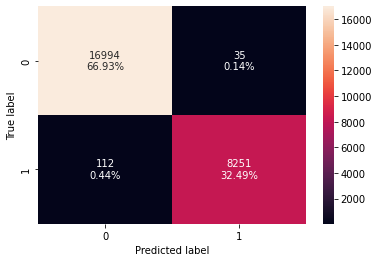

In [98]:
confusion_matrix_sklearn(model,X_train,y_train) 

In [99]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


**Model performance on test set**

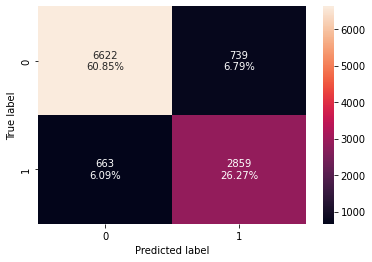

In [100]:
confusion_matrix_sklearn(model,X_test,y_test) 

In [101]:
decision_tree_perf_test = model_performance_classification_sklearn(model,X_test,y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


**Before pruning, important features**

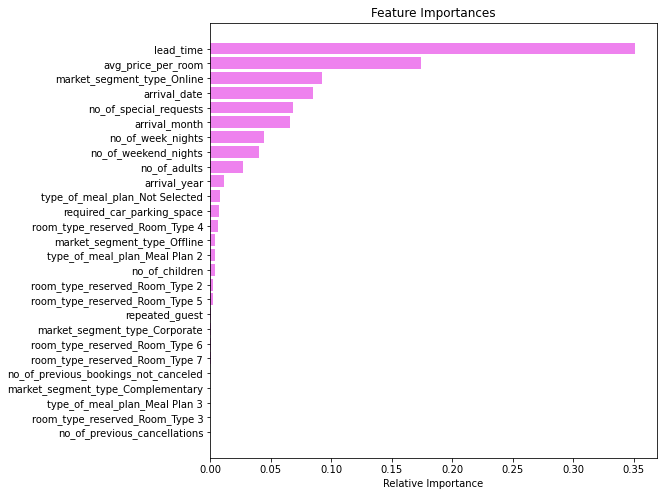

In [102]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   Lead time is the most important feature to decide the motive of the bookings.




**Lets estimate Pre-pruning**

In [103]:
#type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

#scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

#Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

#Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

**Checking performance on training set based on the estimator**

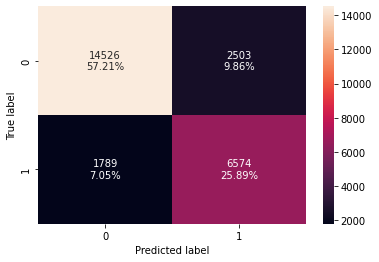

In [104]:
confusion_matrix_sklearn(estimator,X_train,y_train) 

In [105]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


**Checking performance on test set based on estimator**

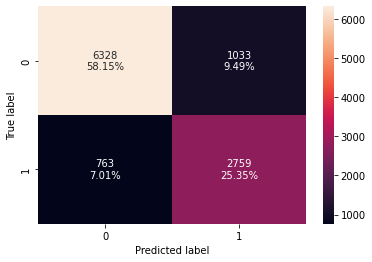

In [106]:
confusion_matrix_sklearn(estimator,X_test,y_test)

In [107]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test) 
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444




*   Re-call on test set and training set has reduced



**Visualizing the decision tree**

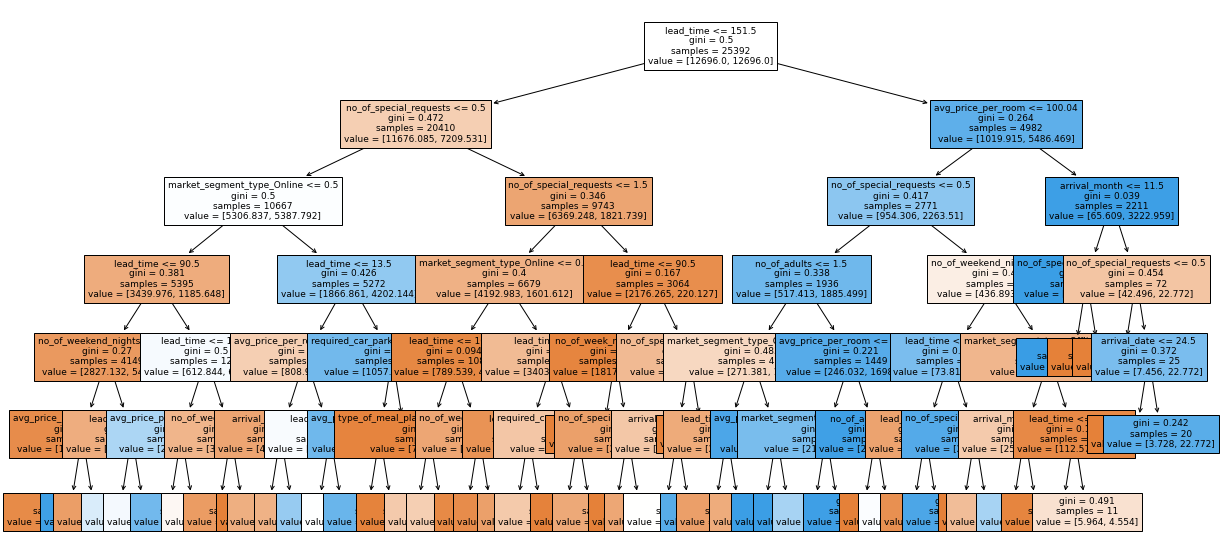

In [108]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [109]:
# Text report showing the rules
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

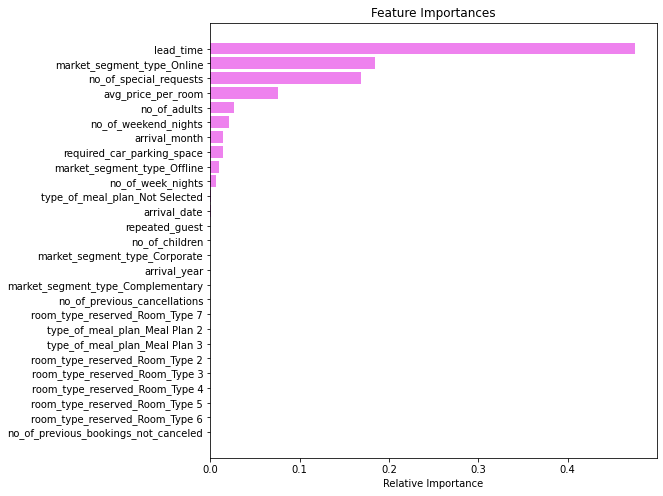

In [110]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   Important changes a bit but lead time is still the most important.



**Cost complexity Pruning**

In [111]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [112]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


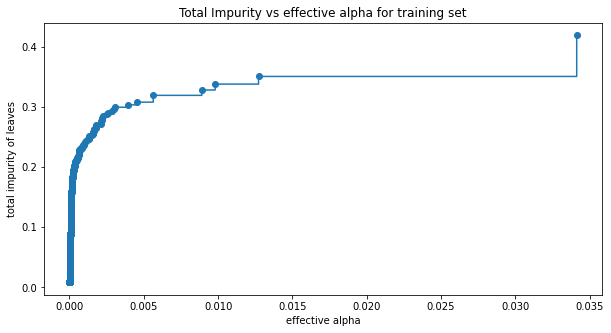

In [113]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Lets train a decision tree using effective alphas**

In [114]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train,y_train) 
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


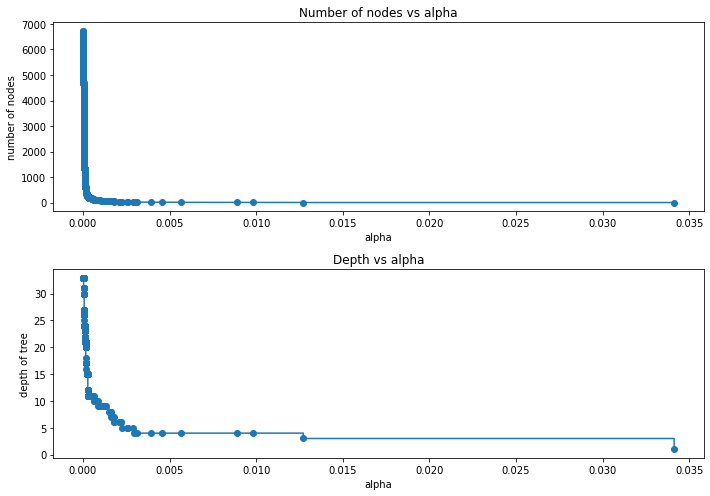

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**F1 score vs alpha for training and testing sets**

In [116]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

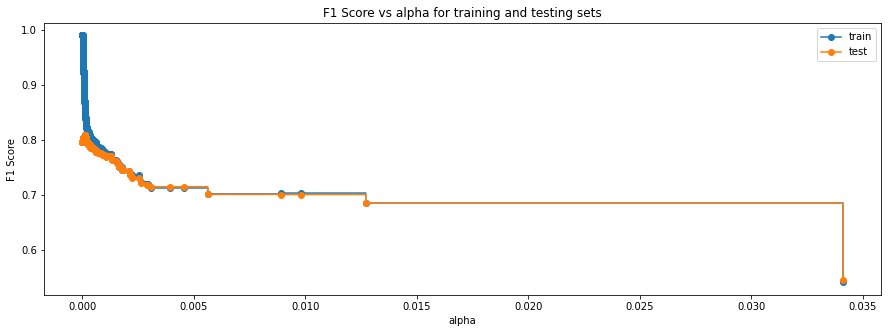

In [117]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [118]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


**Checking performance on training set**

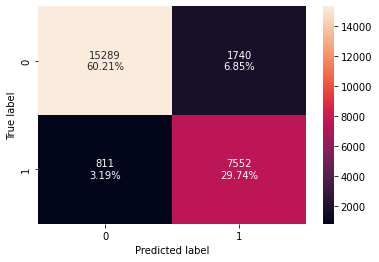

In [119]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [120]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


**Checking performance on test set**

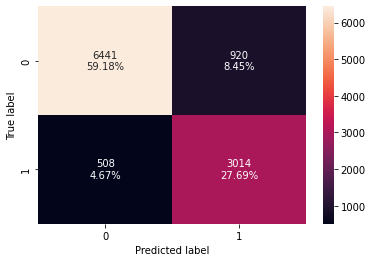

In [121]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [122]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
) 
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


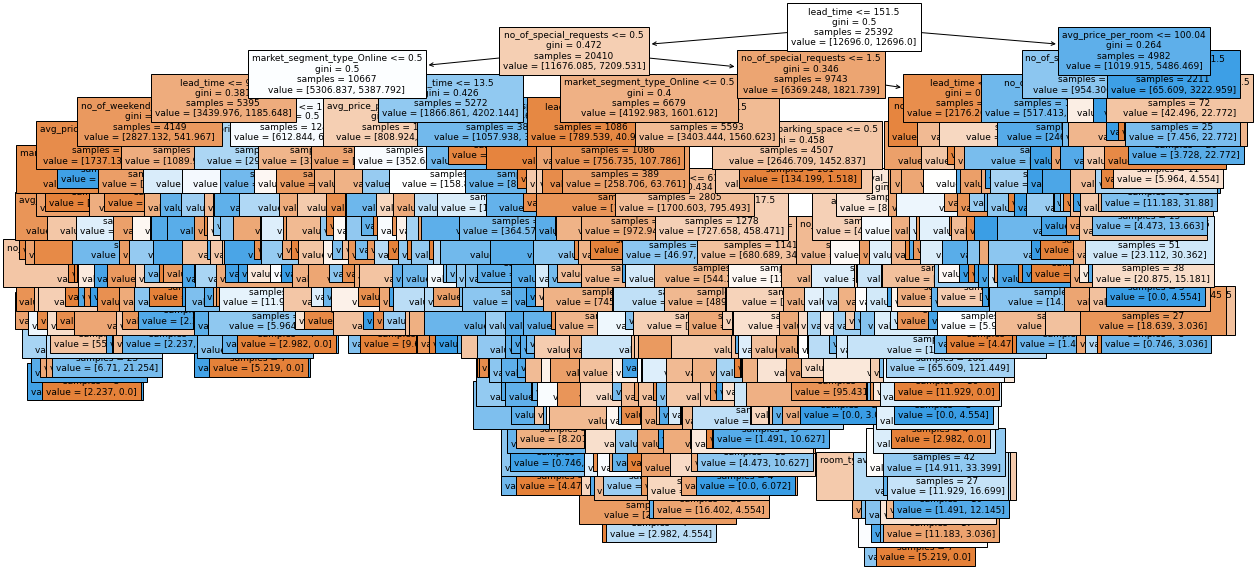

In [123]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [124]:
# Text report showing the rules
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

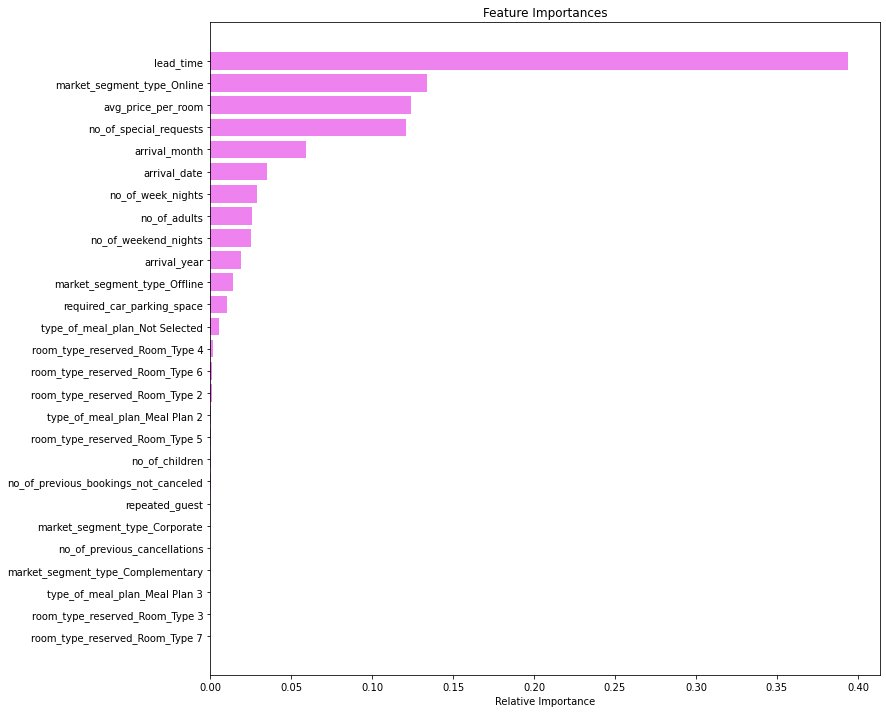

In [125]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   Lead time is still the important feature to decide the motive of bookings.




## Model Performance Comparison and Conclusions

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83097,0.89954
Recall,0.98661,0.78608,0.90303
Precision,0.99578,0.72425,0.81274
F1,0.99117,0.75390,0.85551


In [127]:
#testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87118,0.83497,0.86879
Recall,0.81175,0.78336,0.85576
Precision,0.79461,0.72758,0.76614
F1,0.80309,0.75444,0.80848


## Actionable Insights and Recommendations



*   Looking at the data October is the busiest month.
*   Most of the guests do the bookings online.


*   About 29% of the bookings are cancelled. Repeated guests usually are the one not cancelling the bookings.
*   Looking at the data, INN hotels do a good job in fullfiling guests special requests.

*   INN hotels can work on their lead time and decrease their cancellations. They should reduce their lead time and make it shorter to 2-3 months.
*   They should give out offers in the months which have least number of bookings. 

*   If the guests cancels the booking, they should give out refund in a form of a credit so that they can utilise it over a period of time.










In [128]:
#converting .ipynb to .html
%%shell
jupyter nbconvert --to html //content/drive/MyDrive/SupervisedLearning/Project_SLC_DSBA_INNHotels_FullCode.ipynb

[NbConvertApp] Converting notebook //content/drive/MyDrive/SupervisedLearning/Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] Writing 1963456 bytes to //content/drive/MyDrive/SupervisedLearning/Project_SLC_DSBA_INNHotels_FullCode.html
